# How To Export a Model Trained in Supervisely

After you have trained a model using Supervisely application, you can download its weights and config file, and use the model outside Supervisely Platform.

## 1. Download weights and config from Team Files

1. Go to Team Files

![Team Files](https://github.com/supervisely-ecosystem/mmsegmentation/assets/31512713/678fbf96-e16c-449d-9e5d-1ae4efc8a796)

2. Download the weights and config

![Download model](https://github.com/supervisely-ecosystem/mmsegmentation/assets/31512713/35830bf0-891d-40a3-bfbb-97de2b98cbe5)

Alternatively, you can download these files using Supervisely API:

In [ ]:
# Install supervisely SDK if not installed
!pip install supervisely

In [ ]:
server_address = "https://..."
api_token = "abcd0123456789..."
team_id = ...
path_to_weights_in_team_files = ...
path_to_config_in_team_files = ...
download_dir = "./my_model"

import supervisely as sly
api = sly.Api(server_address, api_token)
api.file.download(team_id, path_to_weights_in_team_files, f"{download_dir}/weights.pth")
api.file.download(team_id, path_to_config_in_team_files, f"{download_dir}/config.py")

After you have downloaded the model, **fill in the paths** where the weights and config files are located:

In [33]:
# Put your paths here:
weights_path = "my_model/weights.pth"
config_path = "my_model/config.py"

device = "cuda:0"

## 2. Install requirements

In [ ]:
!pip install torch==1.10.0+cu111 torchvision==0.11.0+cu111 -f https://download.pytorch.org/whl/torch_stable.html
!pip install mmcv-full==1.4.4 -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.10.0/index.html -U
!pip install mmsegmentation==0.23.0 mmcls==0.21.0

## 3. Build the model

In [59]:
from mmcv import Config
from mmcv.cnn.utils import revert_sync_batchnorm
from mmcv.runner import load_checkpoint
from mmseg.models import build_segmentor

cfg = Config.fromfile(config_path)
cfg.model.pretrained = None
cfg.model.train_cfg = None
model = build_segmentor(cfg.model, test_cfg=cfg.get('test_cfg'))
checkpoint = load_checkpoint(model, weights_path, map_location='cpu')
model.CLASSES = cfg.checkpoint_config.meta.CLASSES
model.PALETTE = cfg.checkpoint_config.meta.PALETTE
model.cfg = cfg
model.to(device)
model.eval()
model = revert_sync_batchnorm(model)

load checkpoint from local path: my_model/weights.pth


## 4. Inference

In [60]:
from mmseg.apis.inference import inference_segmentor

image_path = "demo_data/image_02.jpg"
pred_mask = inference_segmentor(model, image_path)
pred_mask

[array([[5, 5, 5, ..., 5, 5, 5],
        [5, 5, 5, ..., 5, 5, 5],
        [5, 5, 5, ..., 5, 5, 5],
        ...,
        [5, 5, 5, ..., 5, 5, 5],
        [5, 5, 5, ..., 5, 5, 5],
        [5, 5, 5, ..., 5, 5, 5]])]

## 5. Visualize

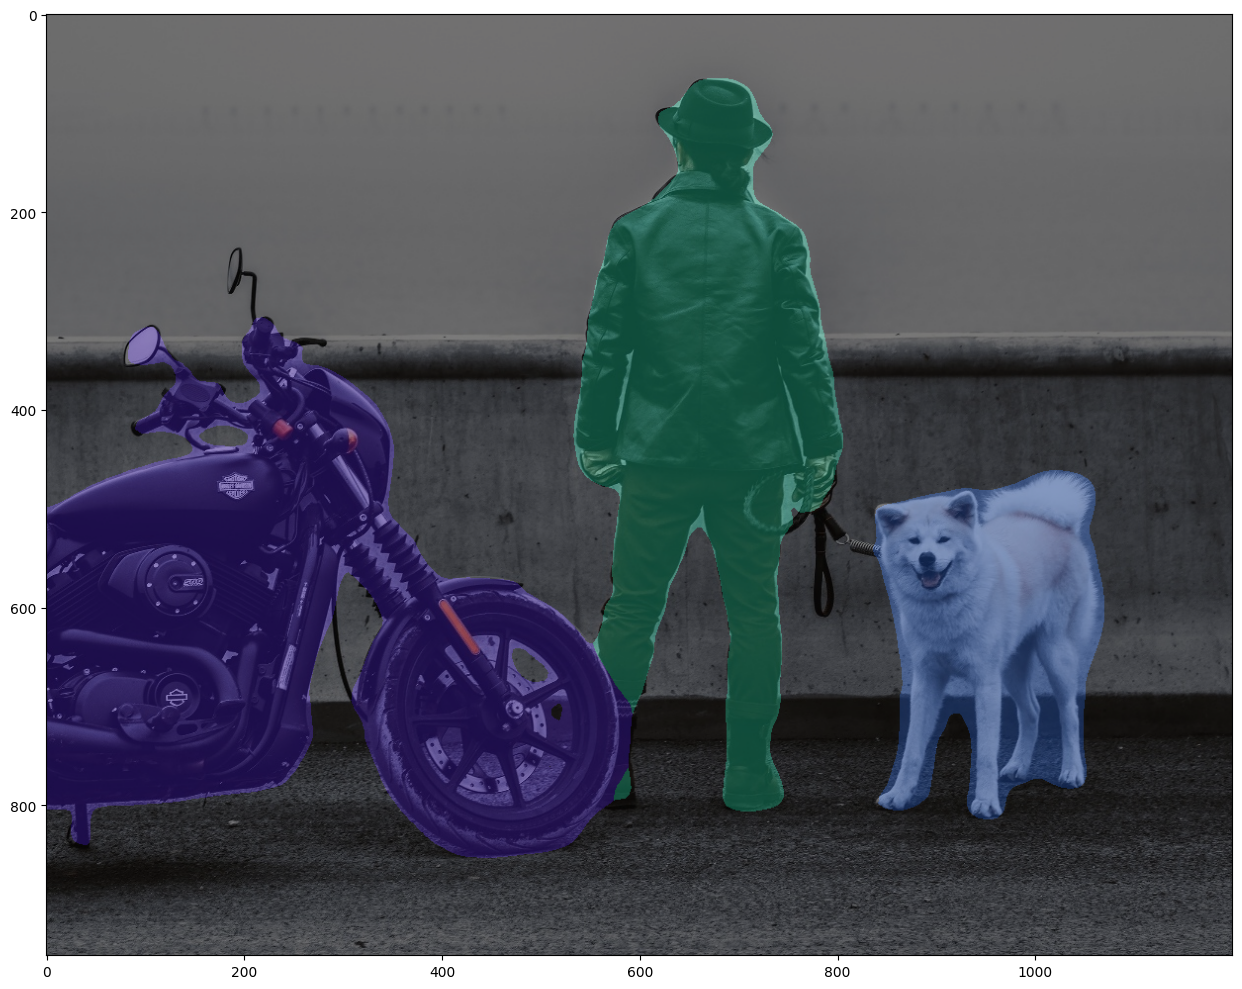

In [61]:
from mmseg.apis.inference import show_result_pyplot

show_result_pyplot(model, image_path, pred_mask)